## Aglomerative Hierarchical Clustering

Working with Mall-Customers dataset. 

Source - Kaggle 

We would form clusters based on only two feartures: Annual Income and Spending Score

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [208]:
data = pd.read_csv('Mall_Customers.csv')

In [209]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [210]:
data.rename(columns={'Genre':'Gender'}, inplace=True)

In [211]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [212]:
data.shape

(200, 5)

There are 200 observations and 5 features.

In [213]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

All the data are numerical in nature.

In [214]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the dataset.

In [215]:
## Since we would work only with Annual Income and Spending Score, we would drop all other features.
data.drop(['CustomerID', 'Gender', 'Age'], axis=1, inplace=True)

In [216]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## DBSCAN

Choosing the best hyperparameters: eps and min_samples

In [217]:
## Choosing the best value for 'eps'

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [218]:
nearest = NearestNeighbors(n_neighbors=2)
nibr = nearest.fit(data)
distance, indices = nibr.kneighbors(data)

In [219]:
distance

array([[ 0.        ,  2.23606798],
       [ 0.        ,  4.12310563],
       [ 0.        ,  2.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.23606798],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  3.16227766],
       [ 0.        ,  4.47213595],
       [ 0.        ,  1.41421356],
       [ 0.        ,  4.12310563],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  6.32455532],
       [ 0.        ,  5.83095189],
       [ 0.        ,  4.12310563],
       [ 0.        ,  3.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  1.        ],
       [ 0.        ,  5.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  1.41421356],
       [ 0.        ,  8.60232527],
       [ 0.        ,

It shows the distance between each pair of datapoints.

In [220]:
indices

array([[  0,   4],
       [  1,   3],
       [  2,   6],
       [  3,   5],
       [  4,   0],
       [  5,   3],
       [  6,   2],
       [  7,  11],
       [  8,   6],
       [  9,   5],
       [ 10,  12],
       [ 11,  19],
       [ 12,  10],
       [ 13,  15],
       [ 14,  10],
       [ 15,  13],
       [ 16,  20],
       [ 17,   9],
       [ 18,  26],
       [ 19,  11],
       [ 20,  16],
       [ 21,  23],
       [ 22,  30],
       [ 23,  21],
       [ 24,  34],
       [ 25,  29],
       [ 26,  28],
       [ 27,  17],
       [ 28,  26],
       [ 29,  25],
       [ 30,  32],
       [ 31,  37],
       [ 32,  30],
       [ 33,  41],
       [ 34,  36],
       [ 35,  25],
       [ 36,  34],
       [ 37,  39],
       [ 38,  44],
       [ 39,  37],
       [ 40,  42],
       [ 41,  33],
       [ 42,  40],
       [ 43,  51],
       [ 44,  38],
       [ 45,  43],
       [ 46,  52],
       [ 47,  54],
       [ 48,  49],
       [ 48,  49],
       [ 50,  52],
       [ 51,  53],
       [ 52,

It shows the pair of datapoints for which the distances have been calculated. 

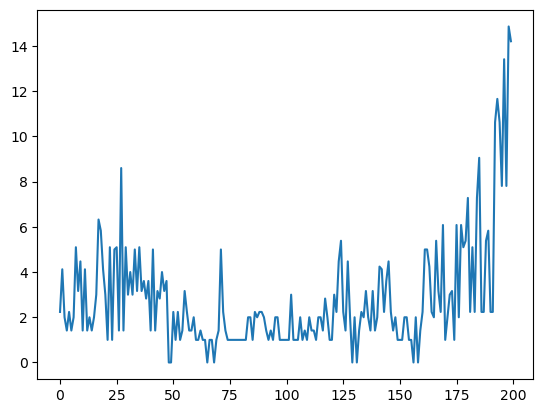

In [221]:
## Plotting the above distances on the graph after sorting them

distance = np.sort(distance, axis=1)
distance = distance[:,1]
plt.plot(distance)

It can be seen that out of all the 200 datapoints, maximum distances lie below 9. So we can take eps=9. 

In [222]:
model = DBSCAN(eps=9)
model.fit(data)

DBSCAN(eps=9)

In [223]:
Cluster = model.labels_

In [224]:
Cluster

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0,  1,  0,  2,  0,  2,  0,  1,  0,  1, -1,
        1,  0,  1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5, -1,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [225]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data, Cluster)
score

0.43598431858196485

In [226]:
## Checking the Silhouette Score for eps=8 and eps=9 to compare with the Silhouette Score for eps=9

model = DBSCAN(eps=10)
model.fit(data)

DBSCAN(eps=10)

In [227]:
Cluster = model.labels_

In [228]:
Cluster

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1, -1,
        1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [229]:
score = silhouette_score(data, Cluster)
score

0.41249187303464097

In [230]:
model = DBSCAN(eps=8)
model.fit(data)

DBSCAN(eps=8)

In [231]:
Cluster = model.labels_

In [232]:
Cluster

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5, -1,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [233]:
score = silhouette_score(data, Cluster)
score

0.3550982050619174

So it can be seen that the Silhouette Score is more for eps=9 than for eps=8,10. So we take eps=9 for our model.

In [234]:
## Choosong the best value for 'min_samples' considering eps=9

Silhouette_Score = []

for i in range(2,20):
    model = DBSCAN(eps=9, min_samples=i)
    model.fit(data)
    Cluster = model.labels_
    score = silhouette_score(data, Cluster)
    Silhouette_Score.append(score)

In [235]:
Silhouette_Score

[0.4437895954843984,
 0.475053701963407,
 0.4259680122384905,
 0.43598431858196485,
 0.35166437164696535,
 0.2928486499658635,
 0.2935222061383018,
 0.20760239612573833,
 0.1651313393319419,
 0.09822413942936498,
 0.1015704250377753,
 0.15213852157178065,
 0.15213852157178065,
 0.15213852157178065,
 0.14719249423007474,
 0.14719249423007474,
 0.14719249423007474,
 0.14070598762588007]

It can be seen that the maximum Silhouette Score is for 'max_samples'=3. So we take max_samples=3 for our model. 

In [236]:
## Model building

final_model = DBSCAN(eps=9, min_samples=3)
final_model.fit(data)

DBSCAN(eps=9, min_samples=3)

In [237]:
Cluster = final_model.labels_

In [238]:
Cluster

array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,
        1,  0,  3,  0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  4,  1,  4,  1,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  4,  5,  4,  5,  6,  5,  6,  5,  4,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,
        5,  6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6, -1,  6,
       -1,  6,  5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [239]:
data['Cluster'] = pd.DataFrame(Cluster, columns=['Cluster'])

In [240]:
data.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,0


The 'Cluster' column shows the cluster in which each of the observation or each customer in the dataset belongs. The observations which are having the Cluster value as -1 it implies that the DBSCAN model has identified those observations or datapoints as outliers and hence are not part of any of the clusters. 

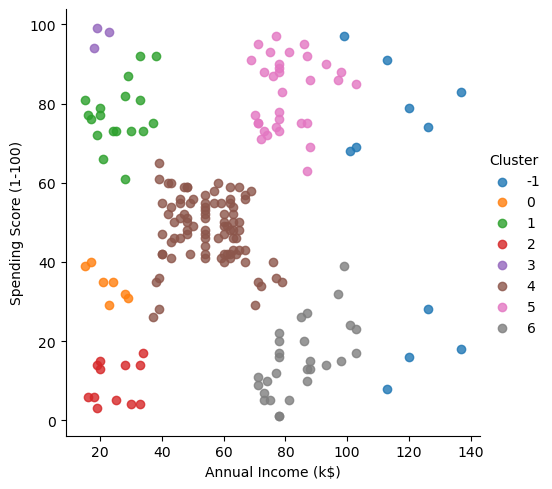

In [241]:
# Visualizing the clusters on the graph.
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, fit_reg=False, hue='Cluster')

So we can see that there are 6 clusters of mall_customers. 

In [242]:
score = silhouette_score(data, Cluster)
print('The silhouette score for our model is :', score)

The silhouette score for our model is : 0.4783262626222251
